**Instructions:** 

1. For all questions in which the dataframe is used without dropping na, row number-1155 should be included.
2. For Q6     :- Output should be boolean only.
3. For Q9     :- Outcome will contain only numerical column.
4. For Q11    :- You need to print the unique destination place names in this and not the count.
5. For Q15,16 :- Popular: It is the place that is visited the most.
6. For Q17    :- Print the most frequent route taken by Uber drivers after dropping null values (Route= combination of START &                  END points present in the Data set). *Note: Only the top most value is expected
7. For Q19    :- You have to plot total/sum miles per purpose.
8. For Q21    :- You can make a countplot or barplot.
9. For Q22    :- Out of the category of trips, you need to find percentage wise how many are business and how many are personal                  on the basis of miles per category.
10. **For all questions after 10th, Please only use the data specified in the note given just below the question**
11. **You need to add answers in the same file i.e.  PDS_UberDriveProject_Questions.ipynb' and rename that file as 'Name_Date.ipynb'.You can mention the date on which you will be uploading/submitting the file.For e.g. if you plan to submit your assignment on 31-March, you can rename the file as 'STUDENTNAME_31-Mar-2020'**

# Import the dataset and Load the dataset. Load the necessary libraries.

In [150]:
%%html
<style>
body{
    font-family:"Comic Sans MS",cursive,sans-serif;
}
</style>

In [151]:
import pandas as pd
import numpy as np
import seaborn as sns   # Why sns?  It's a reference to The West Wing
import matplotlib.pyplot as plt  # seaborn is based on matplotlib
sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline 
# tells python to actually display the graphs

In [152]:
df_uberdrive = pd.read_csv('uberdrive.csv')

In [153]:
df_uberdrive

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Karachi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


## Q1. Show the last 10 records of the dataset. (2 point)

In [154]:
df_uberdrive.tail(10)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1146,12/30/2016 11:31,12/30/2016 11:56,Business,Karachi,Karachi,2.9,Errand/Supplies
1147,12/30/2016 15:41,12/30/2016 16:03,Business,Karachi,Karachi,4.6,Errand/Supplies
1148,12/30/2016 16:45,12/30/2016 17:08,Business,Karachi,Karachi,4.6,Meeting
1149,12/30/2016 23:06,12/30/2016 23:10,Business,Karachi,Karachi,0.8,Customer Visit
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Karachi,Karachi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Karachi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


## Q2. Show the first 10 records of the dataset. (2 points)

In [155]:
df_uberdrive.head(10)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,01-06-2016 17:15,01-06-2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
6,01-06-2016 17:30,01-06-2016 17:35,Business,West Palm Beach,Palm Beach,7.1,Meeting
7,01-07-2016 13:27,01-07-2016 13:33,Business,Cary,Cary,0.8,Meeting
8,01-10-2016 08:05,01-10-2016 08:25,Business,Cary,Morrisville,8.3,Meeting
9,01-10-2016 12:17,01-10-2016 12:44,Business,Jamaica,New York,16.5,Customer Visit


## Q3. Show the dimension of the dataset. (2 points)

In [156]:
(df_uberdrive).shape

(1156, 7)

## Q4. Show the size of the dataset. (2 points)

In [157]:
df_uberdrive.size

8092

## Q5. Print the information about all the variables of the data set. (2 points)

In [158]:
print(df_uberdrive.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB
None


## Q6. Check for missing values. (2 points)

In [159]:
df_uberdrive.isnull().values.any()

True

## Q7. How many missing values are present? (2 points)

In [160]:
df_uberdrive.isnull().values.sum()


507

## Q8. Get the initial data (name it 'df') with dropping the NA values. (2 points)

In [161]:
df=df_uberdrive.dropna()

In [162]:
df.isnull().values.any()


False


# Q9. Get the summary of the original data (before dropping the 'na' values). (2 points)

In [163]:
df_uberdrive.describe()

,MILES*
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000






## Q10. Check the information of the new dataframe. (2 points)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  653 non-null    object 
 1   END_DATE*    653 non-null    object 
 2   CATEGORY*    653 non-null    object 
 3   START*       653 non-null    object 
 4   STOP*        653 non-null    object 
 5   MILES*       653 non-null    float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 40.8+ KB






## Q11. Get the unique start destinations. (2 points)
### Note: This question is based on the dataframe with no 'na' values in the 'START' variable.

In [165]:
df_uberdrive['START*'].unique()

array(['Fort Pierce', 'West Palm Beach', 'Cary', 'Jamaica', 'New York',
       'Elmhurst', 'Midtown', 'East Harlem', 'Flatiron District',
       'Midtown East', 'Hudson Square', 'Lower Manhattan',
       "Hell's Kitchen", 'Downtown', 'Gulfton', 'Houston', 'Eagan Park',
       'Morrisville', 'Durham', 'Farmington Woods', 'Whitebridge',
       'Lake Wellingborough', 'Fayetteville Street', 'Raleigh',
       'Hazelwood', 'Fairmont', 'Meredith Townes', 'Apex', 'Chapel Hill',
       'Northwoods', 'Edgehill Farms', 'Tanglewood', 'Preston',
       'Eastgate', 'East Elmhurst', 'Jackson Heights', 'Long Island City',
       'Katunayaka', 'Unknown Location', 'Colombo', 'Nugegoda',
       'Islamabad', 'R?walpindi', 'Noorpur Shahan', 'Heritage Pines',
       'Westpark Place', 'Waverly Place', 'Wayne Ridge', 'Weston',
       'East Austin', 'West University', 'South Congress', 'The Drag',
       'Congress Ave District', 'Red River District', 'Georgian Acres',
       'North Austin', 'Coxville', 'Conven


## Q12. What is the total number of unique start destinations? (2 points)
### Note: This question is based on the dataframe with no 'na' values in the 'START' variable.

In [166]:
df_uberdrive['START*'].nunique()

176

## Q13. Print the total number of unique stop destinations. (2 points)
### Note: This question is based on the dataframe with no 'na' values in the 'STOP' variable.

In [167]:
df_uberdrive['STOP*'].nunique()

187

## Q14. Print all the Uber trips that has the starting point of San Francisco. (2 points)
### Note: Use the original dataframe without dropping the 'na' values.

In [168]:
df_uberdrive.loc[df_uberdrive["START*"] == "San Francisco"]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
362,05-09-2016 14:39,05-09-2016 15:06,Business,San Francisco,Palo Alto,20.5,Between Offices
440,6/14/2016 16:09,6/14/2016 16:39,Business,San Francisco,Emeryville,11.6,Meeting
836,10/19/2016 14:02,10/19/2016 14:31,Business,San Francisco,Berkeley,10.8,NaN
917,11-07-2016 19:17,11-07-2016 19:57,Business,San Francisco,Berkeley,13.2,Between Offices
919,11-08-2016 12:16,11-08-2016 12:49,Business,San Francisco,Berkeley,11.3,Meeting
927,11-09-2016 18:40,11-09-2016 19:17,Business,San Francisco,Oakland,12.7,Customer Visit
933,11-10-2016 15:17,11-10-2016 15:22,Business,San Francisco,Oakland,9.9,Temporary Site
966,11/15/2016 20:44,11/15/2016 21:00,Business,San Francisco,Berkeley,11.8,Temporary Site


## Q15. What is the most popular starting point for the Uber drivers? (2 points)
### Note: This question is based on the dataframe with no 'na' values in the 'START' variable.

In [187]:
popularstartpoint = df_uberdrive["START*"].dropna()
df = pd.DataFrame(popularstartpoint.value_counts())
df.sort_values(["START*"], ascending = False)
df = df.reset_index()
df = df.rename(columns = {'index':'startpoint', 'START*':'Count'})
df.loc[df['Count'] == max(df['Count'])]

,startpoint,Count
0,Cary,201


## Q16. What is the most popular dropping point for the Uber drivers? (2 points)
### Note: This question is based on the dataframe with no 'na' values in the 'STOP' variable.

In [186]:
populardroppoint = df_uberdrive["STOP*"].dropna()
df = pd.DataFrame(populardroppoint.value_counts())
df.sort_values(["STOP*"], ascending = False)
df = df.reset_index()
df = df.rename(columns = {'index':'droppoint', 'STOP*':'Count'})
df.loc[df['Count'] == max(df['Count'])]


,droppoint,Count
0,Cary,203


## Q17. List the most frequent route taken by Uber drivers. (3 points)
### Note: This question is based on the dataframe with no 'na' values.

In [196]:
df= df_uberdrive.dropna()
df= pd.DataFrame(df.groupby(['START*', 'STOP*']).size())
df= df.rename(columns = {0:'Mostfrequentroute'})
df1= df.sort_values(['Mostfrequentroute'], ascending = False)
df.loc[df['Mostfrequentroute'] == max(df1['Mostfrequentroute'])]

,,Mostfrequentroute
START*,STOP*,
Cary,Morrisville,52


## Q18. Print all types of purposes for the trip in an array. (3 points)
### Note: This question is based on the dataframe with no 'na' values in the 'PURPOSE' variable.


In [126]:
print(np.array(df_uberdrive['PURPOSE*'].dropna().unique()))
df_uberdrive['MILES*'].groupby(df_uberdrive['PURPOSE*']).sum()

['Meal/Entertain' 'Errand/Supplies' 'Meeting' 'Customer Visit'
 'Temporary Site' 'Between Offices' 'Charity ($)' 'Commute' 'Moving'
 'Airport/Travel']


PURPOSE*
Airport/Travel       16.5
Between Offices     197.0
Charity ($)          15.1
Commute             180.2
Customer Visit     2089.5
Errand/Supplies     508.0
Meal/Entertain      911.7
Meeting            2851.3
Moving               18.2
Temporary Site      523.7
Name: MILES*, dtype: float64

## Q19. Plot a bar graph of Purposes vs Distance. (3 points)
### Note: This question is based on the original dataframe.

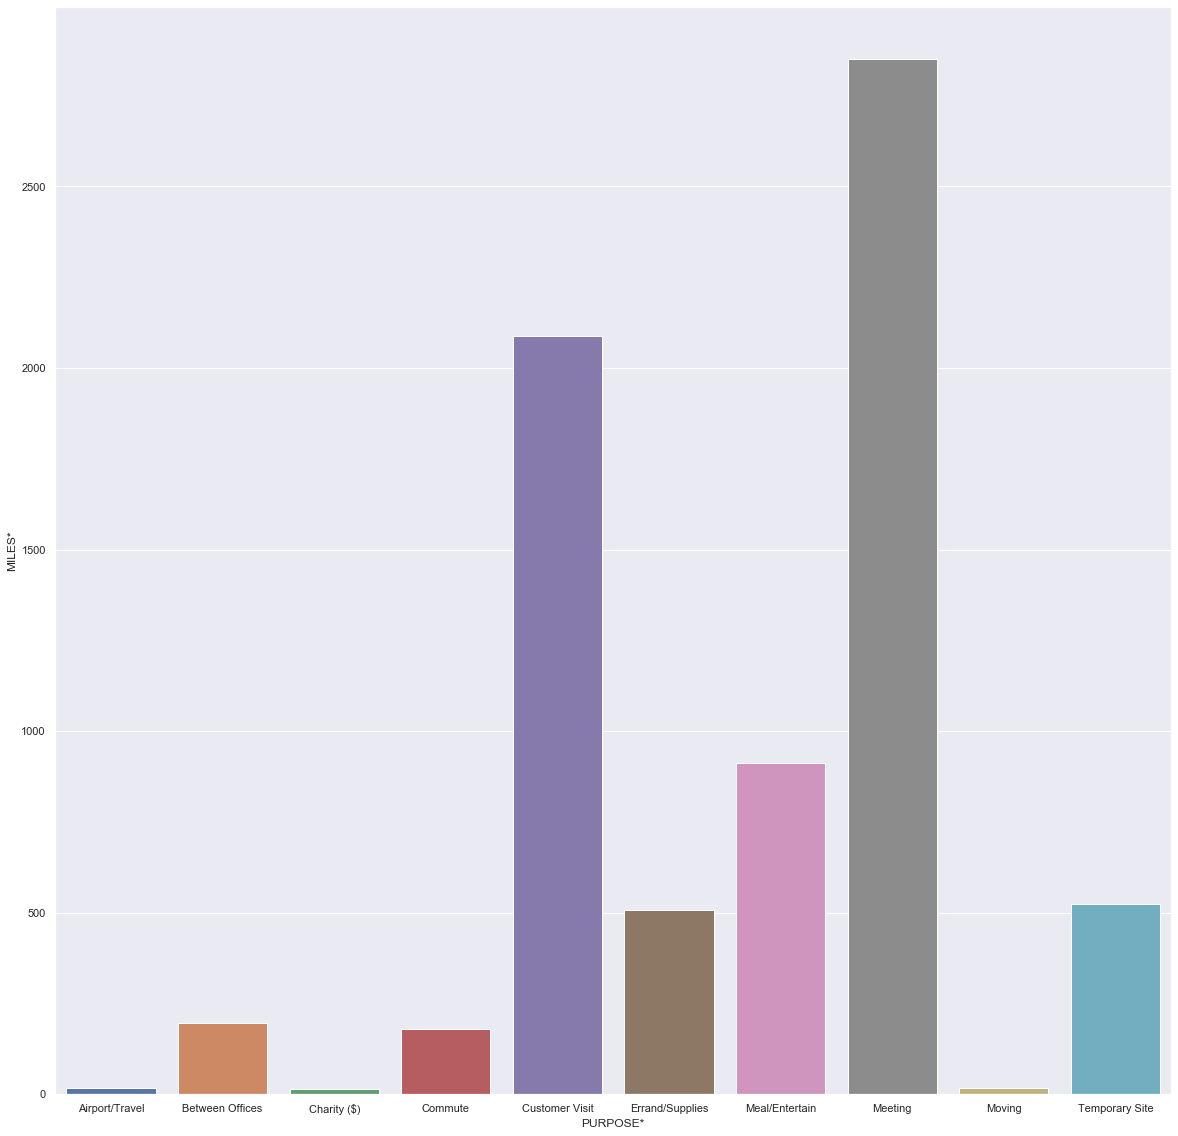

In [127]:
fig,ax=plt.subplots(figsize=(20,20))
newpurpose=df_uberdrive.groupby(['PURPOSE*'],as_index=False)['MILES*'].sum()
sns.barplot(newpurpose['PURPOSE*'],newpurpose['MILES*'])

## Q20. Print a dataframe of Purposes and the distance travelled for that particular Purpose. (3 points)
### Note: This question is based on the original dataframe.

In [128]:
pd.DataFrame(df_uberdrive.groupby("PURPOSE*")["MILES*"].sum())

,MILES*
PURPOSE*,
Airport/Travel,16.5
Between Offices,197.0
Charity ($),15.1
Commute,180.2
Customer Visit,2089.5
Errand/Supplies,508.0
Meal/Entertain,911.7
Meeting,2851.3
Moving,18.2


## Q21. Plot number of trips vs Category of trips. (3 points)
### Note: This question is based on the original dataframe.

In [129]:
df_uberdrive.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


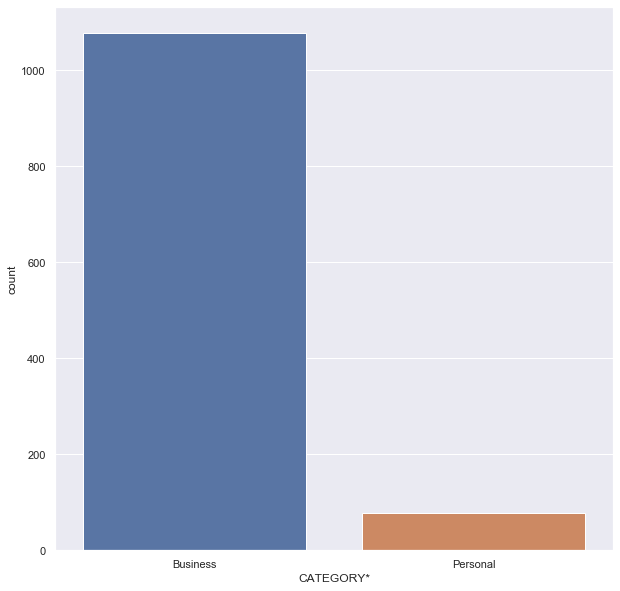

In [148]:
fig,ax=plt.subplots(figsize=(10,10))
sns.countplot(df_uberdrive["CATEGORY*"])
plt.show()

## Q22. What is proportion of trips that is Business and what is the proportion of trips that is Personal? (3 points)
### Note: The proportion calculation  is with respect to the 'miles' variable.
### Note: This question is based on the original dataframe.

In [138]:
proportion= df_uberdrive.drop(df_uberdrive.tail(1).index)
proportion.groupby("CATEGORY*")["MILES*"].sum()/proportion["MILES*"].sum()

CATEGORY*
Business    0.941195
Personal    0.058805
Name: MILES*, dtype: float64